In [1]:
# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks'?
# 5.) How much value do we put at risk by investing in a particular stock?
# 6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [3]:
columnsHistoricalbars = ['close','high','low','trade','open','time','volume','volumeWeighted']

def adaptDataTime(df): 
    df.columns = columnsHistoricalbars 
    df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%dT%H:%M:%SZ')
    df['year'] = df['time'].dt.year
    df['month'] = df['time'].dt.month
    df = df.set_index(df['time'].dt.strftime('%Y-%m-%d'))
    return df


In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

AAPL = pd.read_json('../data/AAPL.csv', convert_dates=['t'])
AAPL = pd.json_normalize(AAPL['bars']['AAPL'])
AAPL = adaptDataTime(AAPL)

GOOG = pd.read_json('../data/GOOG.csv', convert_dates=['t'])
GOOG = pd.json_normalize(GOOG['bars']['GOOG'])
GOOG = adaptDataTime(GOOG)

MSFT = pd.read_json('../data/MSFT.csv', convert_dates=['t'])
MSFT = pd.json_normalize(MSFT['bars']['MSFT'])
MSFT = adaptDataTime(MSFT)

AMZN = pd.read_json('../data/AMZN.csv', convert_dates=['t'])
AMZN = pd.json_normalize(AMZN['bars']['AMZN'])
AMZN = adaptDataTime(AMZN)

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

In [5]:
display(df.head(10))
display(df.tail(10))

,close,high,low,trade,open,time,volume,volumeWeighted,year,month,company_name
time,,,,,,,,,,,
2019-01-04,148.26,148.5499,143.80,375701,144.53,2019-01-04 05:00:00,61778347,146.851272,2019,1,APPLE
2019-01-07,147.93,148.8300,145.90,348123,148.70,2019-01-07 05:00:00,57558992,147.402035,2019,1,APPLE
2019-01-08,150.75,151.8200,148.52,272200,149.56,2019-01-08 05:00:00,43262815,150.170519,2019,1,APPLE
2019-01-09,153.31,154.5300,149.63,302939,151.22,2019-01-09 05:00:00,47357421,152.930700,2019,1,APPLE
2019-01-10,153.80,153.9700,150.86,202212,152.50,2019-01-10 05:00:00,38352943,152.806588,2019,1,APPLE
2019-01-11,152.29,153.7000,151.51,174409,152.88,2019-01-11 05:00:00,29188016,152.395147,2019,1,APPLE
2019-01-14,150.00,151.2700,149.22,201656,150.85,2019-01-14 05:00:00,35615230,150.023109,2019,1,APPLE
2019-01-15,153.07,153.3900,150.05,178871,150.27,2019-01-15 05:00:00,30521774,152.377469,2019,1,APPLE
2019-01-16,154.94,155.8800,153.00,193217,153.08,2019-01-16 05:00:00,32715874,154.925875,2019,1,APPLE


,close,high,low,trade,open,time,volume,volumeWeighted,year,month,company_name
time,,,,,,,,,,,
2023-12-19,153.79,155.120,152.69,384210,154.40,2023-12-19 05:00:00,43176530,153.721710,2023,12,AMAZON
2023-12-20,152.12,155.630,151.56,461546,152.90,2023-12-20 05:00:00,50330348,153.687370,2023,12,AMAZON
2023-12-21,153.84,153.970,152.10,350198,153.30,2023-12-21 05:00:00,36311565,153.109193,2023,12,AMAZON
2023-12-22,153.42,154.350,152.71,310405,153.77,2023-12-22 05:00:00,29490644,153.544613,2023,12,AMAZON
2023-12-26,153.41,153.975,153.03,282665,153.56,2023-12-26 05:00:00,25069259,153.408219,2023,12,AMAZON
2023-12-27,153.34,154.780,153.12,311508,153.56,2023-12-27 05:00:00,31435661,153.643762,2023,12,AMAZON
2023-12-28,153.38,154.080,152.95,302006,153.72,2023-12-28 05:00:00,27059987,153.526856,2023,12,AMAZON
2023-12-29,151.94,153.890,151.03,352850,153.10,2023-12-29 05:00:00,39800567,152.327859,2023,12,AMAZON
2024-01-02,149.93,152.380,148.39,476537,151.54,2024-01-02 05:00:00,47342997,149.852676,2024,1,AMAZON


In [6]:
AAPL.describe()

,close,high,low,trade,open,time,volume,volumeWeighted,year,month
count,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258,1.258000e+03,1258.000000,1258.000000,1258.000000
mean,187.469273,189.406410,185.240064,5.569523e+05,187.192867,2021-07-03 20:49:30.429252864,7.301942e+07,187.419406,2021.003180,6.550874
min,106.840000,110.190000,103.100000,7.513200e+04,104.540000,2019-01-04 05:00:00,1.276575e+07,107.022019,2019.000000,1.000000
25%,144.810000,146.475000,142.654150,3.526675e+05,144.041250,2020-04-03 22:00:00,4.046197e+07,144.741103,2020.000000,4.000000
50%,168.850000,170.780000,167.147500,5.387510e+05,169.005000,2021-07-04 04:00:00,6.688348e+07,168.806587,2021.000000,7.000000
75%,199.245000,200.707500,198.025000,6.882645e+05,199.100000,2022-10-02 10:00:00,9.430991e+07,199.287689,2022.000000,10.000000
max,506.090000,515.140000,500.330000,2.962331e+06,514.790000,2024-01-03 05:00:00,3.570209e+08,505.387478,2024.000000,12.000000
std,69.275799,69.928398,68.282833,3.002091e+05,68.998151,NaN,4.247103e+07,69.191753,1.416458,3.430784


In [7]:
AAPL.info()
display(company['company_name'].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2019-01-04 to 2024-01-03
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   close           1258 non-null   float64       
 1   high            1258 non-null   float64       
 2   low             1258 non-null   float64       
 3   trade           1258 non-null   int64         
 4   open            1258 non-null   float64       
 5   time            1258 non-null   datetime64[ns]
 6   volume          1258 non-null   int64         
 7   volumeWeighted  1258 non-null   float64       
 8   year            1258 non-null   int32         
 9   month           1258 non-null   int32         
 10  company_name    1258 non-null   object        
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2), object(1)
memory usage: 108.1+ KB


array(['AMAZON'], dtype=object)

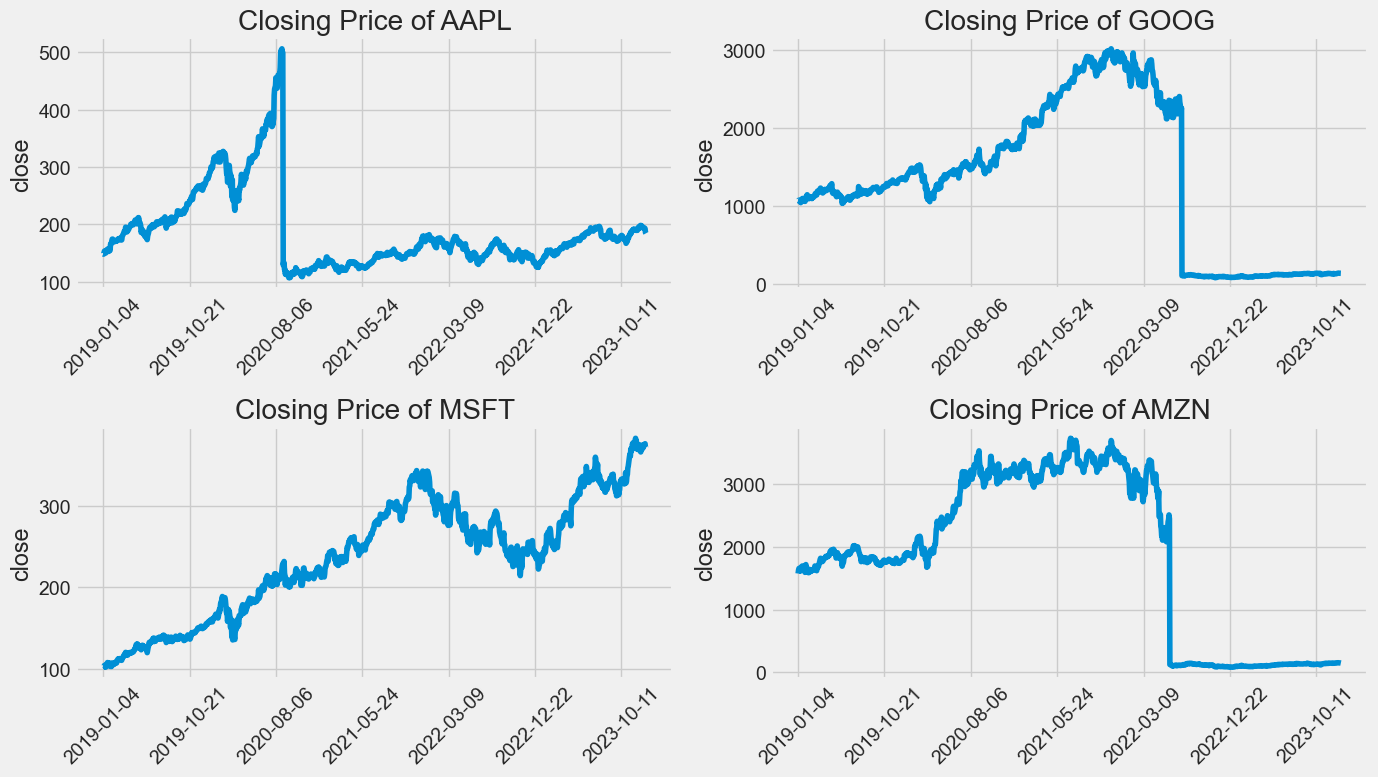

In [8]:
# Let's see a historical view of the closing price
plt.figure(figsize=(14, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

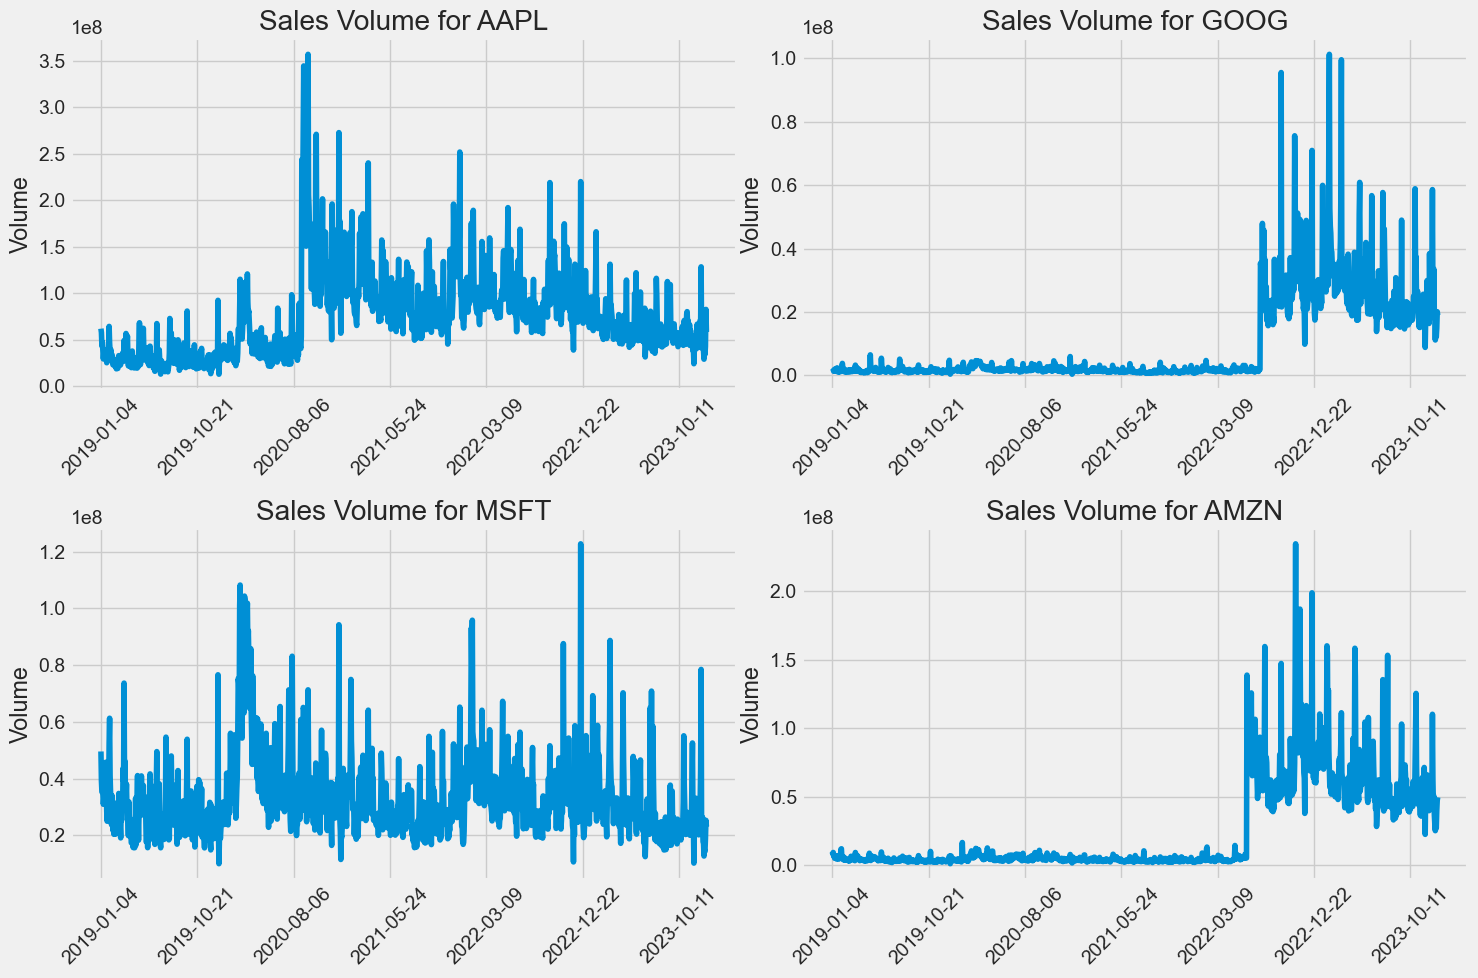

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation=45)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

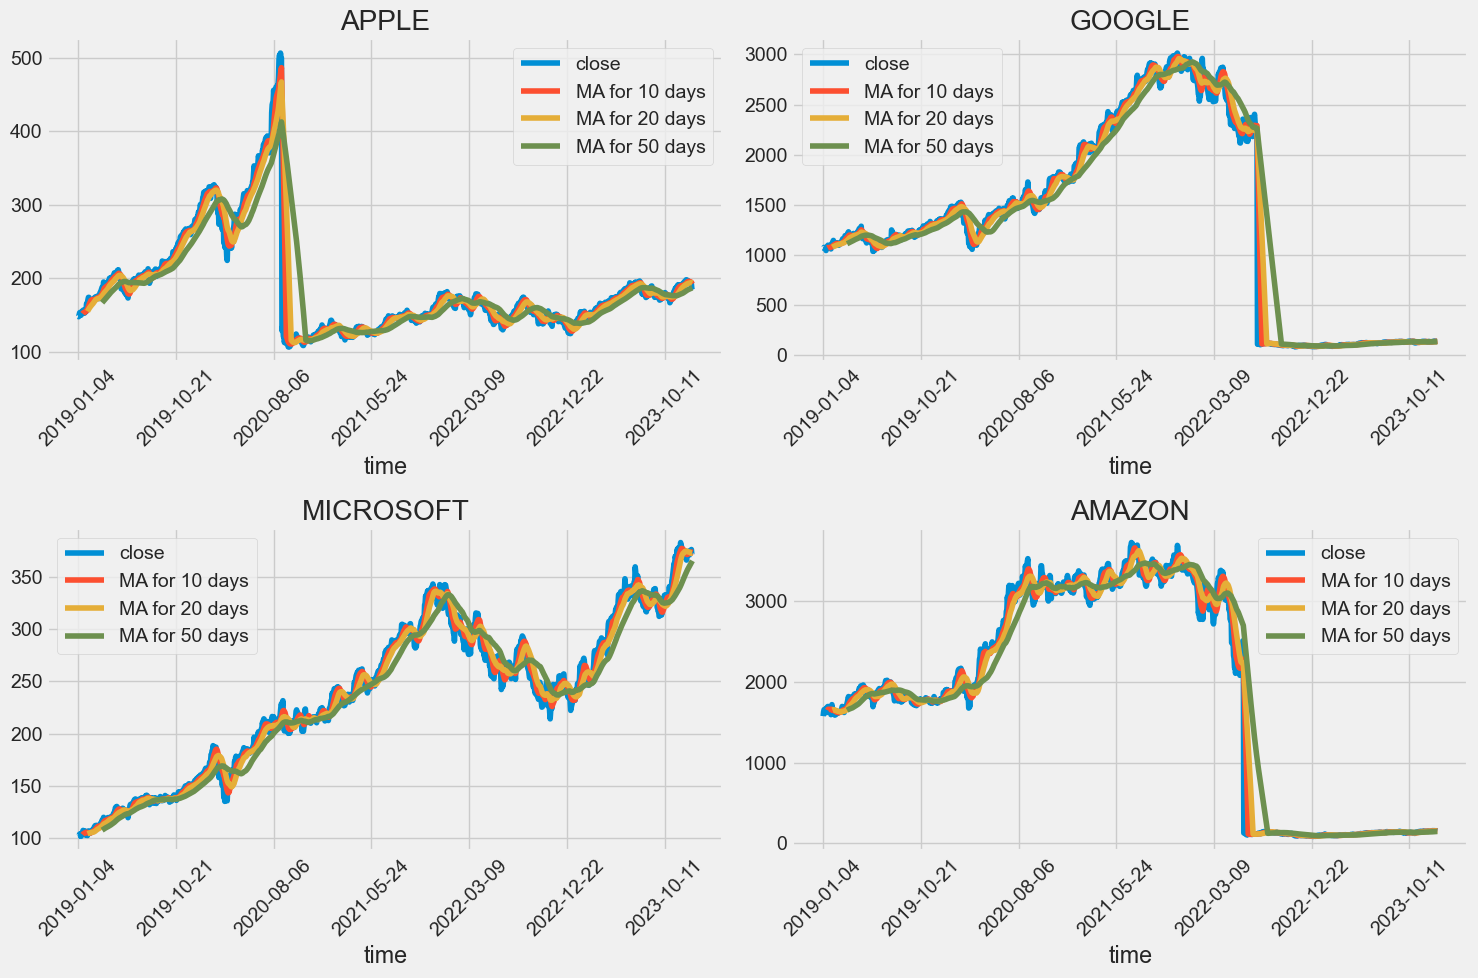

In [10]:
# Simple MA
# SMA, short for Simple Moving Average, calculates the average of a range of stock (closing) prices over a specific number of periods in that range. 
# The formula for SMA is:  ( SMA = P1 + P2 + .... Pn / N )
# where Pn = the stock price at time point n, N = the number of time points.

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()

# display(company.head(10))
# company.loc[np.isnan(company.loc[:, 'MA for 10 days']), 'MA for 10 days'] = company.loc[np.isnan(company.loc[:, 'MA for 10 days']), 'close']
# company.loc[np.isnan(company.loc[:, 'MA for 20 days']), 'MA for 20 days'] = company.loc[np.isnan(company.loc[:, 'MA for 20 days']), 'close']
# company.loc[np.isnan(company.loc[:, 'MA for 50 days']), 'MA for 50 days'] = company.loc[np.isnan(company.loc[:, 'MA for 50 days']), 'close']

# company['MA for 50 days'] = company['MA for 50 days'].astype(np.float64) 
# # display(company.loc[np.isnan(company.loc[:, 'MA for 50 days']), :])
# display(company.isnull().sum())

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
GOOG[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
MSFT[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
AMZN[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])

axes[0,0].set_title('APPLE')
axes[0,1].set_title('GOOGLE')
axes[1,0].set_title('MICROSOFT')
axes[1,1].set_title('AMAZON')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

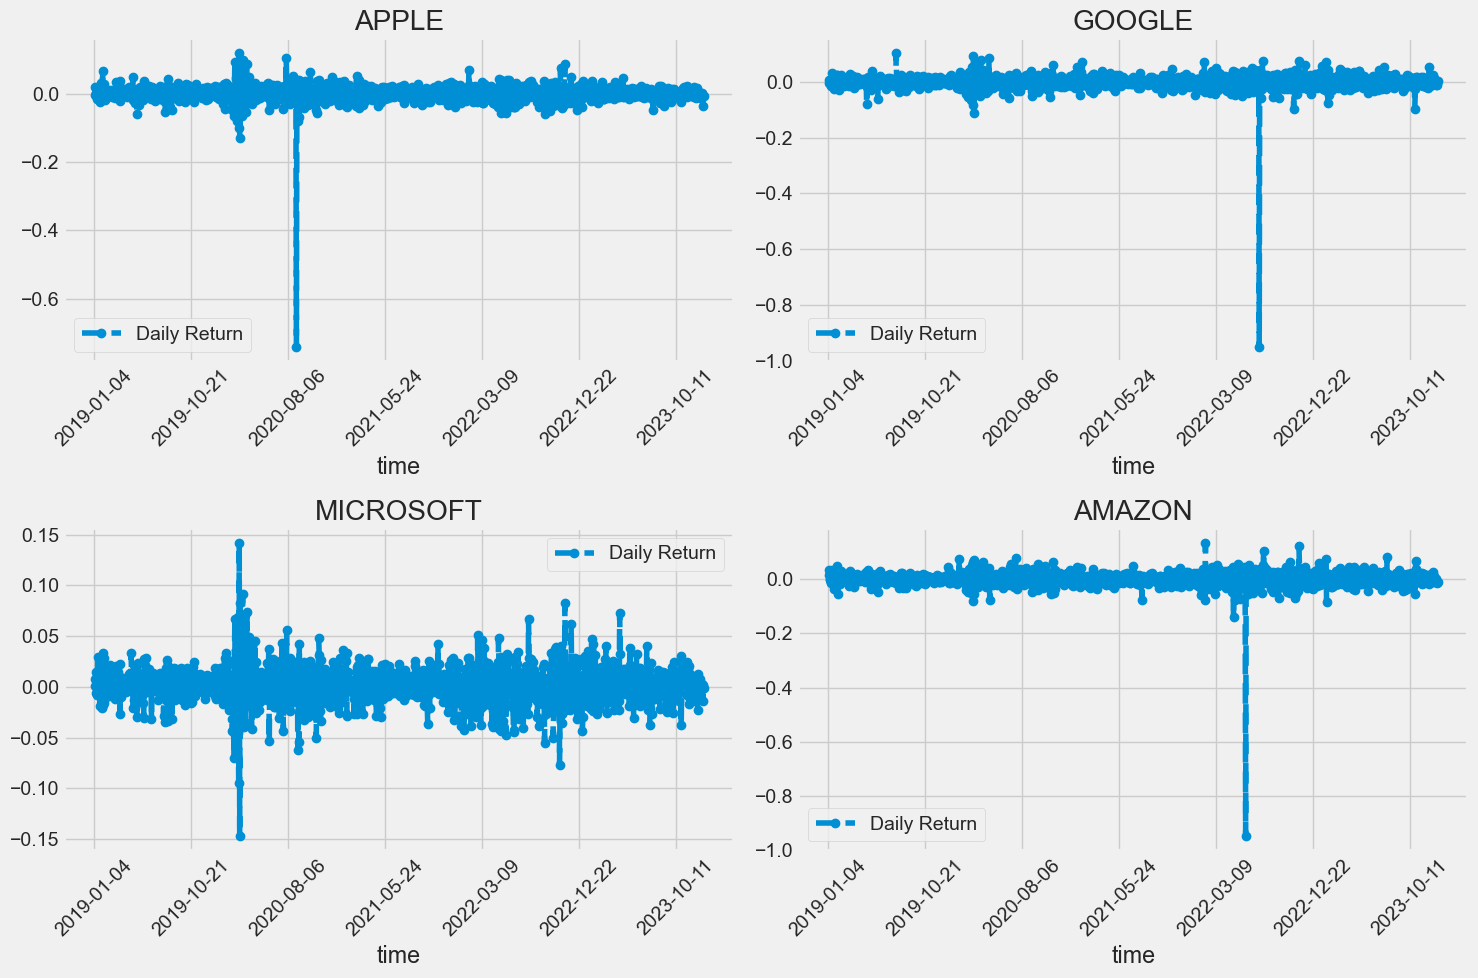

In [11]:
# 3. What was the daily return of the stock on average?

# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()

In [12]:
AAPL['Daily Return'].unique()

array([        nan, -0.00222582,  0.01906307, ..., -0.00542411,
       -0.03578663, -0.00748761])

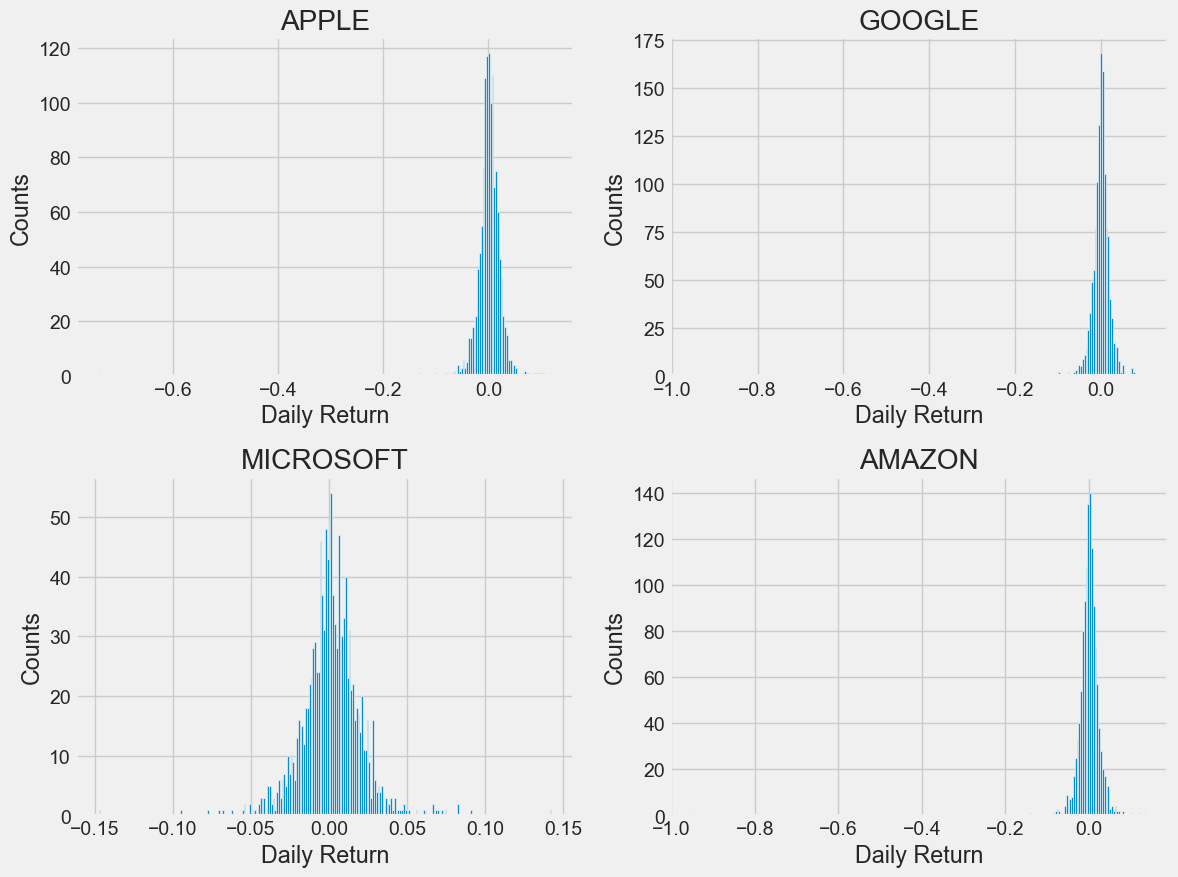

In [13]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=250)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [14]:
# 4. What was the correlation between different stocks closing prices?

# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)
# display(closing_df.head(10))

#closing_df = pd.DataFrame( index=pd.date_range(start, ( end - start).days , freq='D'))
closing_df = pd.DataFrame( index=AAPL.index)

for company, com_name in zip(company_list, tech_list):
        closing_df[str(com_name)] = company['close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
time,,,,
2019-01-04,NaN,NaN,NaN,NaN
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612
2019-01-09,0.016982,-0.001505,0.014300,0.001714
2019-01-10,0.003196,-0.004029,-0.006426,-0.001928


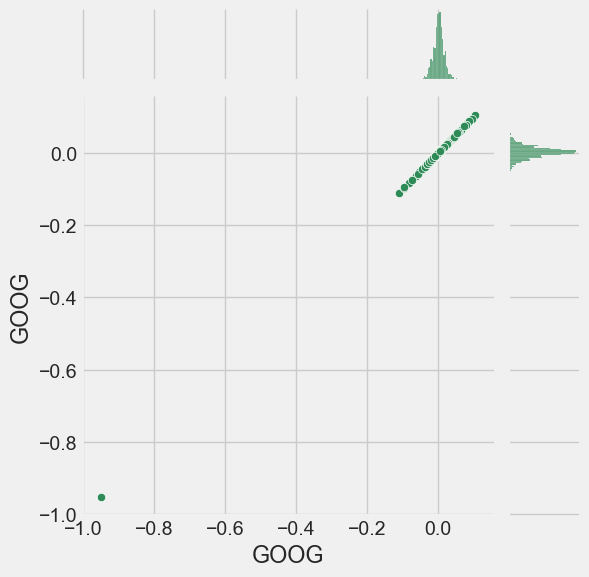

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

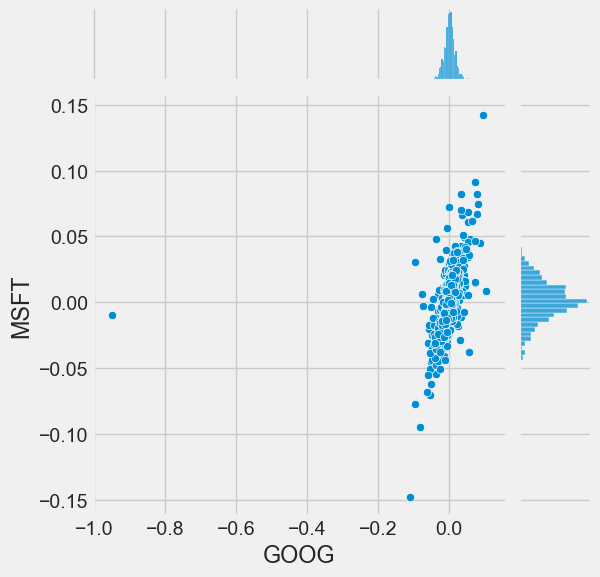

In [16]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

In [17]:
# So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.
# Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

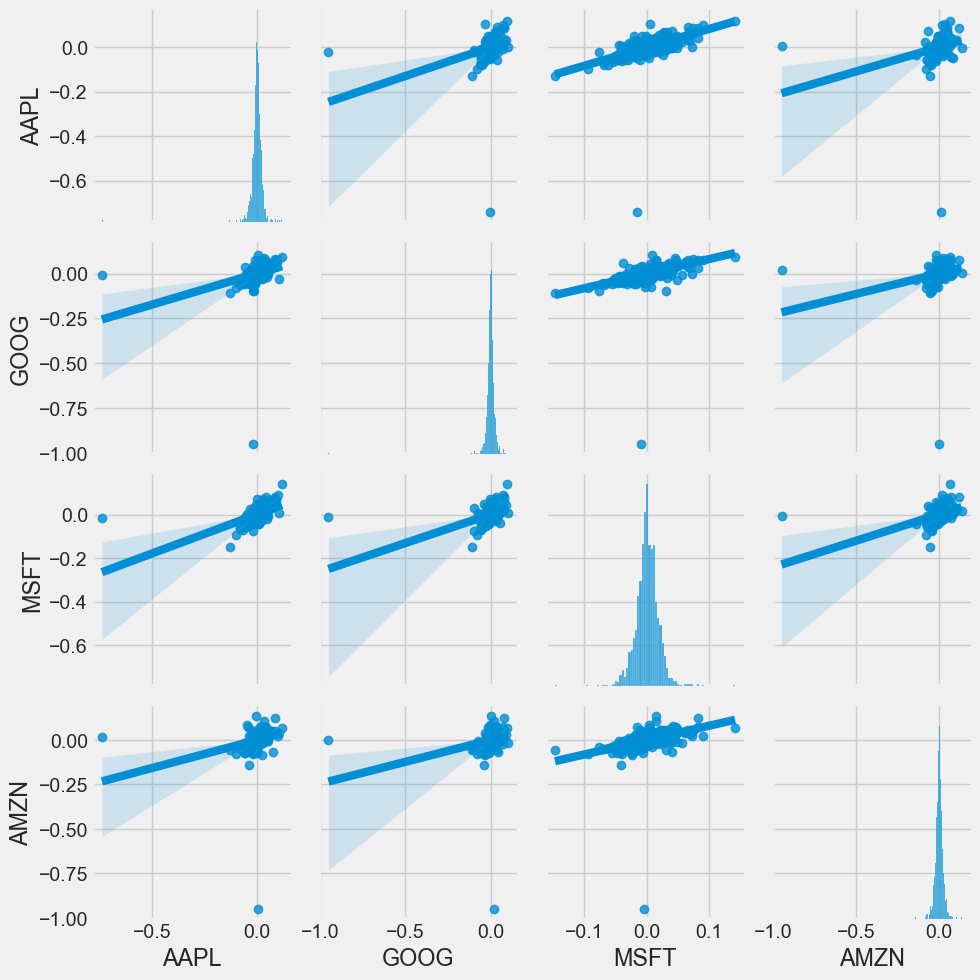

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

In [19]:
# Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns.
# It might be interesting to investigate that individual comaprison.

# While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle.
# Below is an example of utilizing the full power of seaborn to achieve this result.

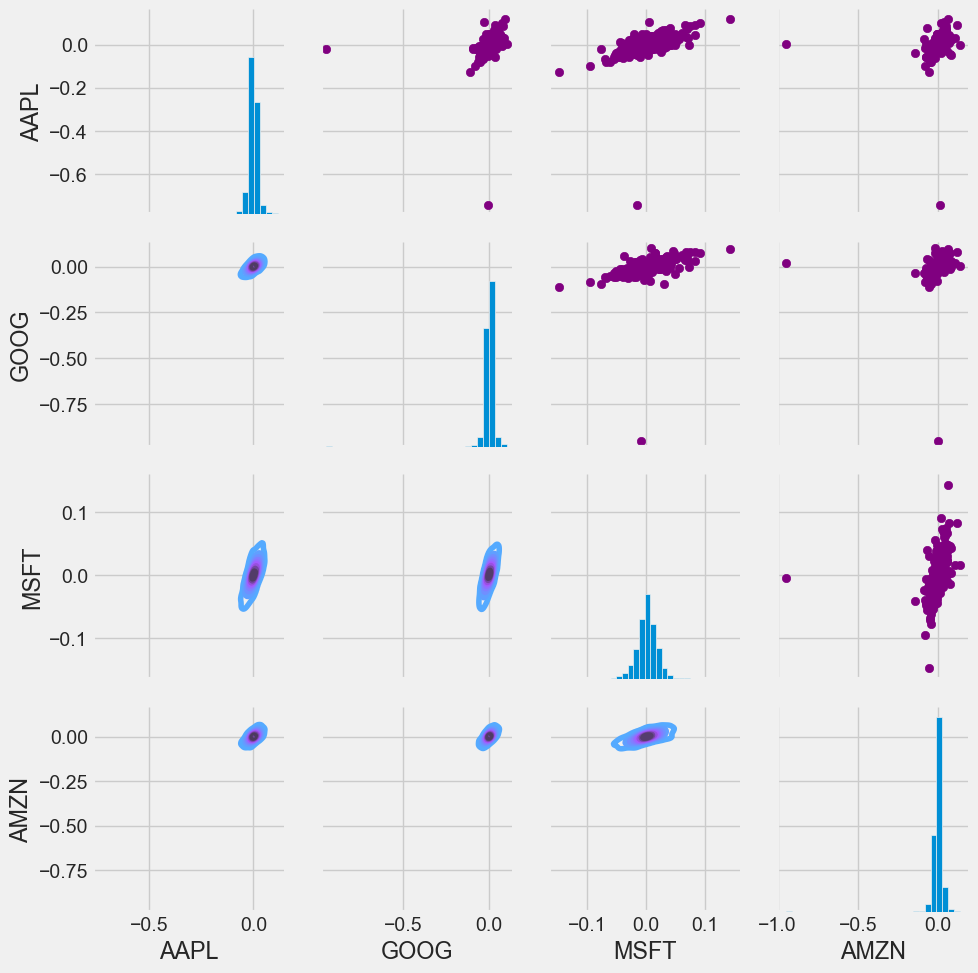

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

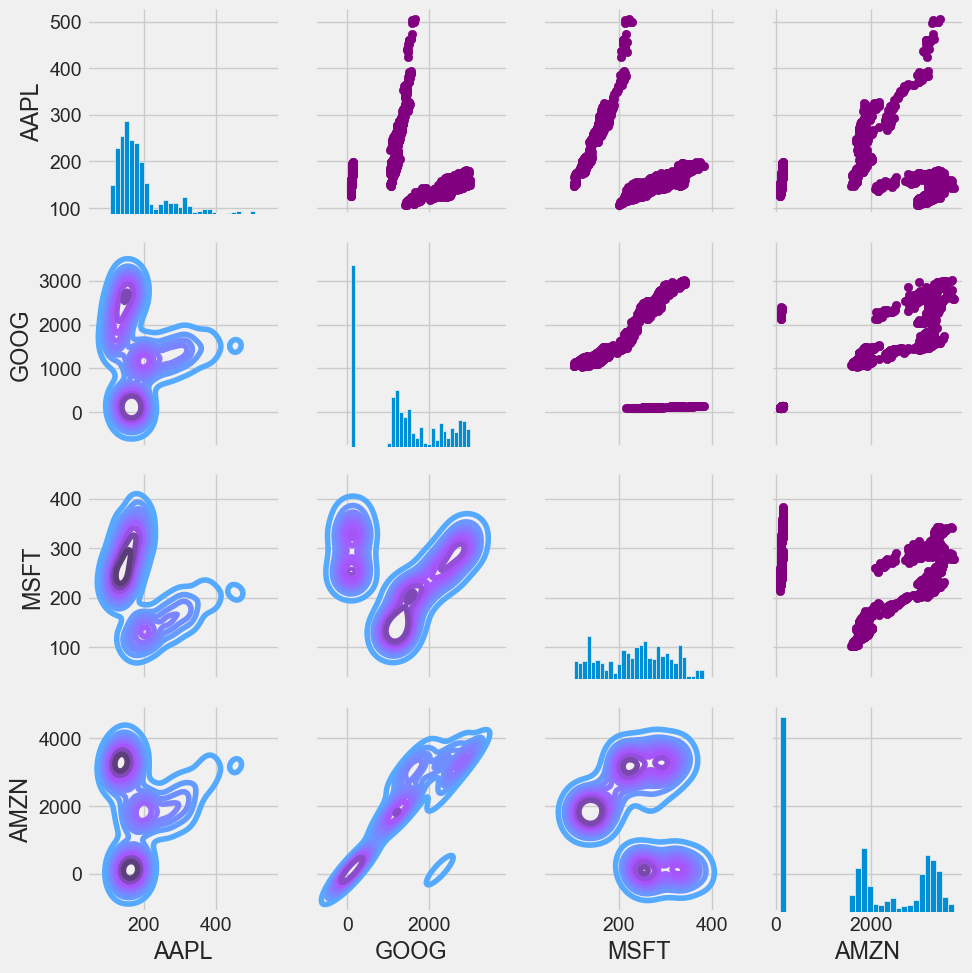

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

In [22]:
# Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.
# By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

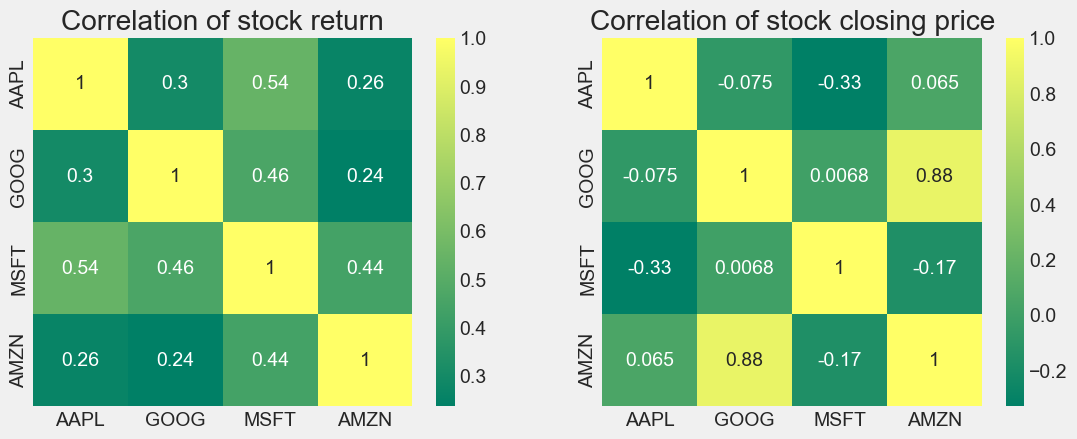

In [23]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [24]:
# Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return.
# It's also interesting to see that all the technology companies are positively correlated.

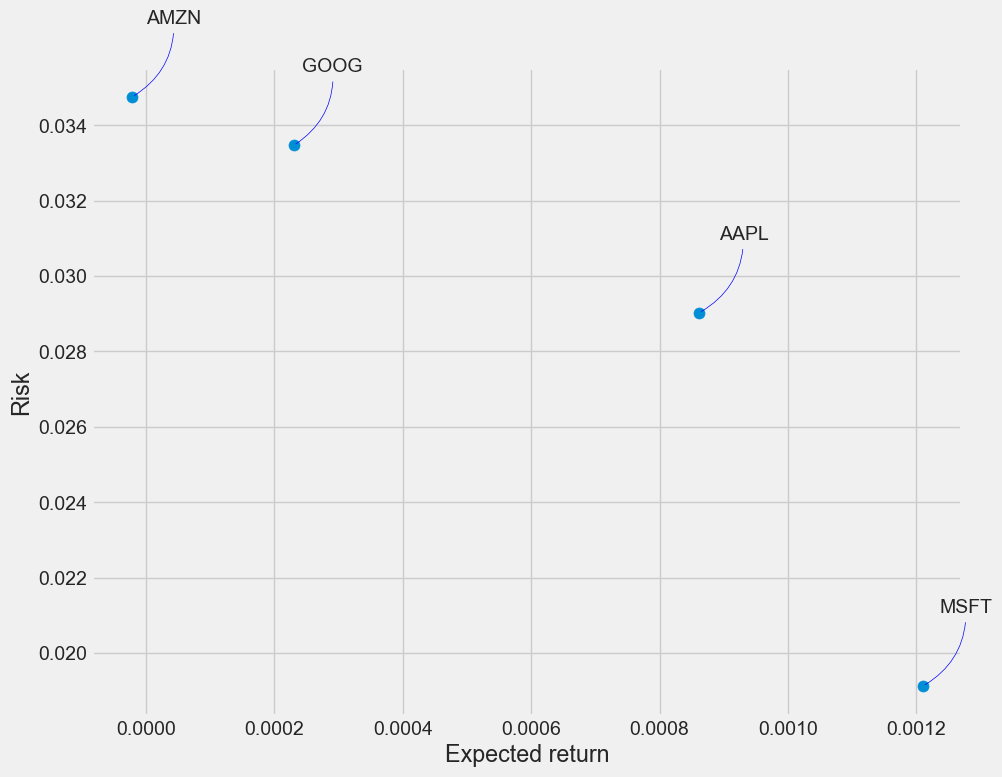

In [25]:
# 5. How much value do we put at risk by investing in a particular stock?

# There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [26]:
# 6. Predicting the closing price stock price of APPLE inc:

# Get the stock quote
df = AAPL.copy()
# Show teh data
df

,close,high,low,trade,open,time,volume,volumeWeighted,year,month,company_name,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
time,,,,,,,,,,,,,,,
2019-01-04,148.26,148.5499,143.800,375701,144.53,2019-01-04 05:00:00,61778347,146.851272,2019,1,APPLE,NaN,NaN,NaN,NaN
2019-01-07,147.93,148.8300,145.900,348123,148.70,2019-01-07 05:00:00,57558992,147.402035,2019,1,APPLE,NaN,NaN,NaN,-0.002226
2019-01-08,150.75,151.8200,148.520,272200,149.56,2019-01-08 05:00:00,43262815,150.170519,2019,1,APPLE,NaN,NaN,NaN,0.019063
2019-01-09,153.31,154.5300,149.630,302939,151.22,2019-01-09 05:00:00,47357421,152.930700,2019,1,APPLE,NaN,NaN,NaN,0.016982
2019-01-10,153.80,153.9700,150.860,202212,152.50,2019-01-10 05:00:00,38352943,152.806588,2019,1,APPLE,NaN,NaN,NaN,0.003196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,193.15,193.5000,191.090,548205,192.49,2023-12-27 05:00:00,48092035,192.567912,2023,12,APPLE,195.578,193.9690,185.9714,0.000518
2023-12-28,193.58,194.6600,193.170,472490,194.14,2023-12-28 05:00:00,34056639,193.922138,2023,12,APPLE,195.140,194.1795,186.3000,0.002226
2023-12-29,192.53,194.4000,191.725,508500,193.90,2023-12-29 05:00:00,42643843,192.576356,2023,12,APPLE,194.582,194.3085,186.6338,-0.005424


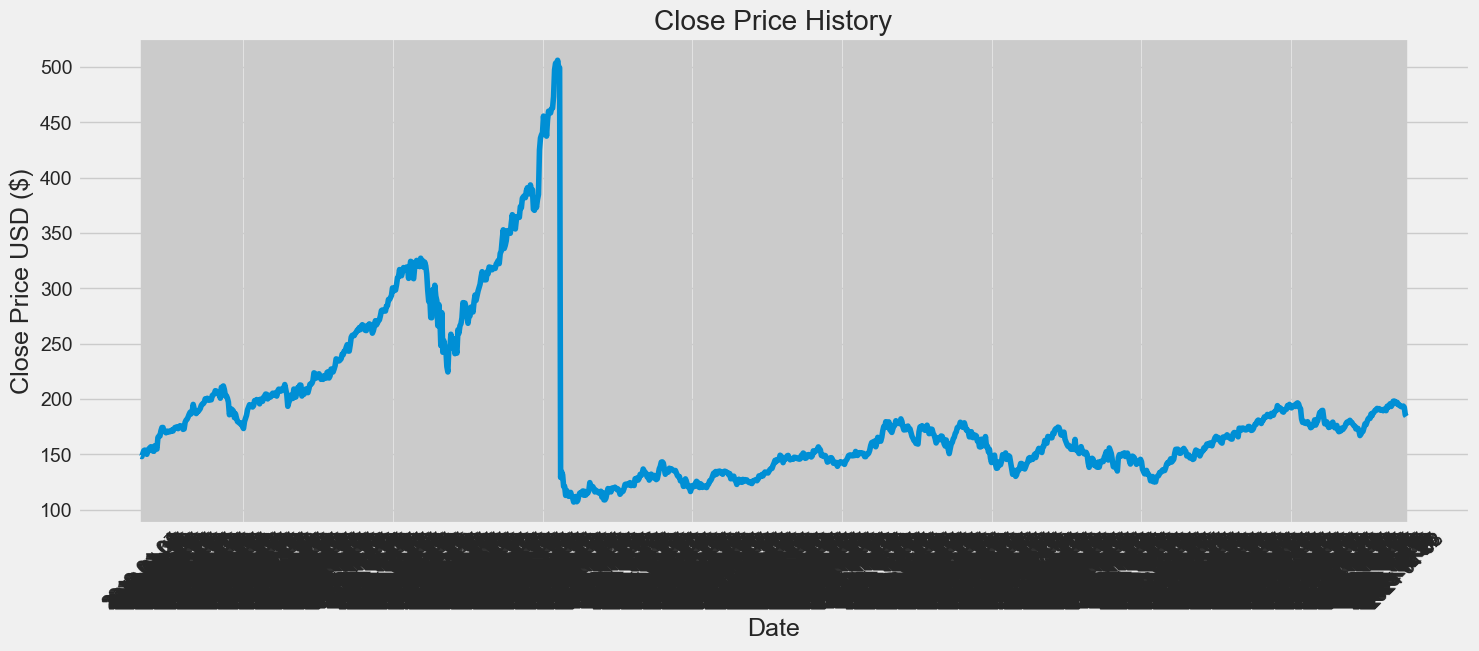

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xticks(rotation=45)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['close']) 

# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

1196

In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.10374452],
       [0.10291797],
       [0.10998121],
       ...,
       [0.21462743],
       [0.19737007],
       [0.19388854]])

In [30]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:
    #     print(x_train)
    #     print(y_train)
    #     print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1136/1136 [==============================] - 53s 42ms/step - loss: 0.0054


In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 2s 30ms/step


2.9722003503516397

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208884\942293429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


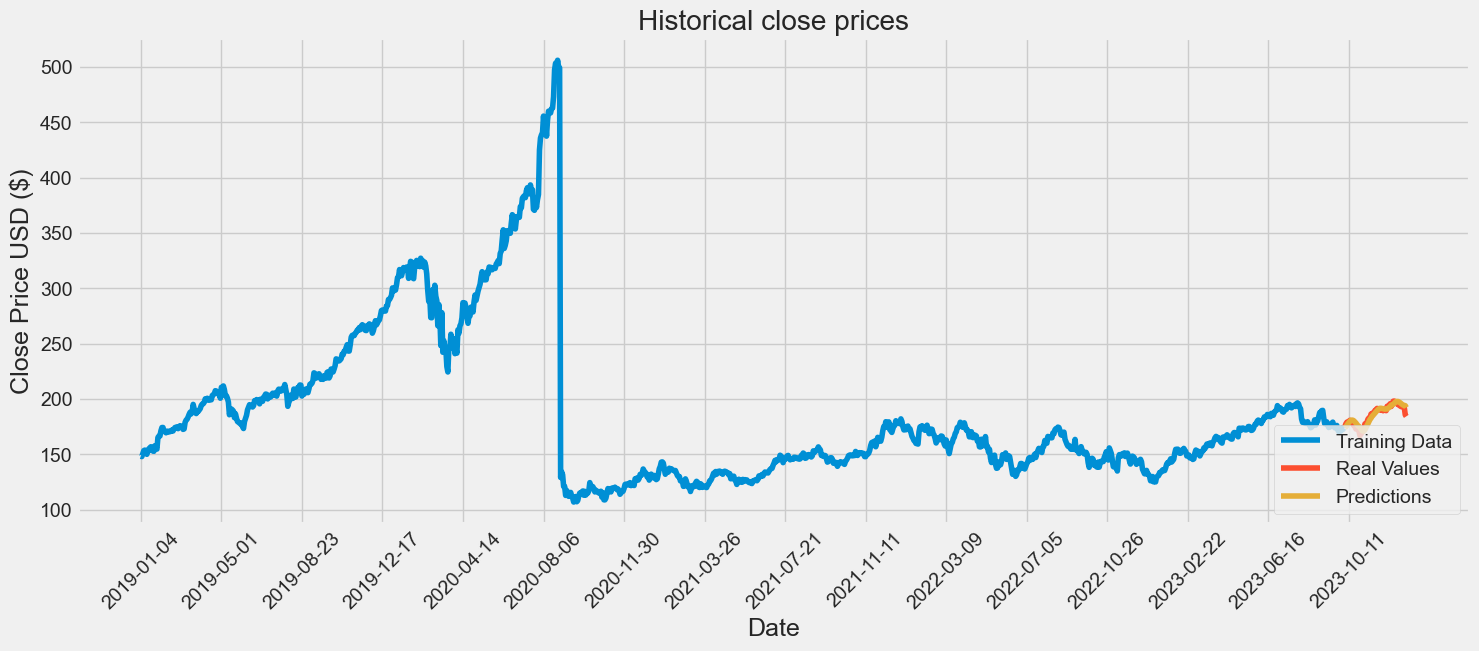

In [33]:
import matplotlib.dates as mdates

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Historical close prices')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Training Data', 'Real Values', 'Predictions'], loc='lower right')

# Rotate and format the x-axis labels
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optional: Adjust tick frequency
interval = 80  # Adjust the interval to suit your data
plt.xticks(np.arange(0, len(data), step=interval))

plt.show()

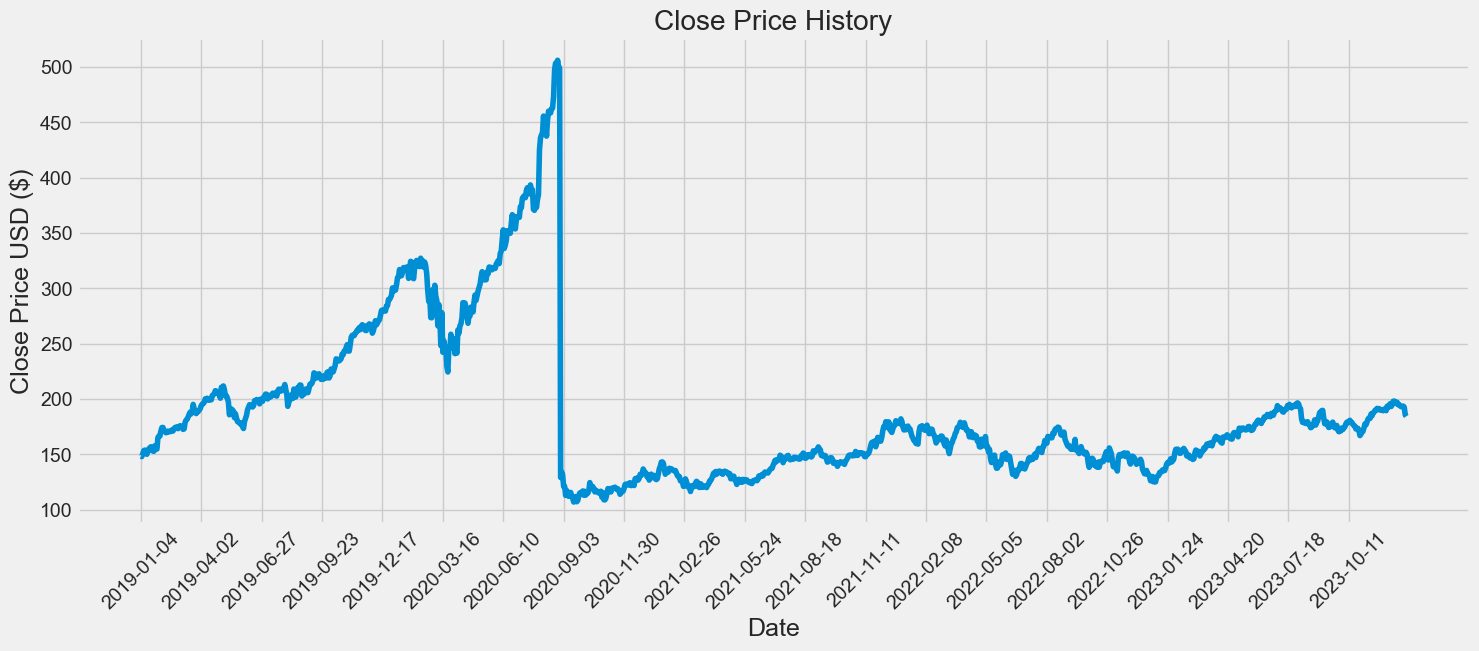

In [34]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Rotate and format the x-axis labels
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optional: Adjust tick frequency
interval = 60  # Adjust the interval to suit your data
plt.xticks(np.arange(0, len(data), step=interval))

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208884\2487477014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


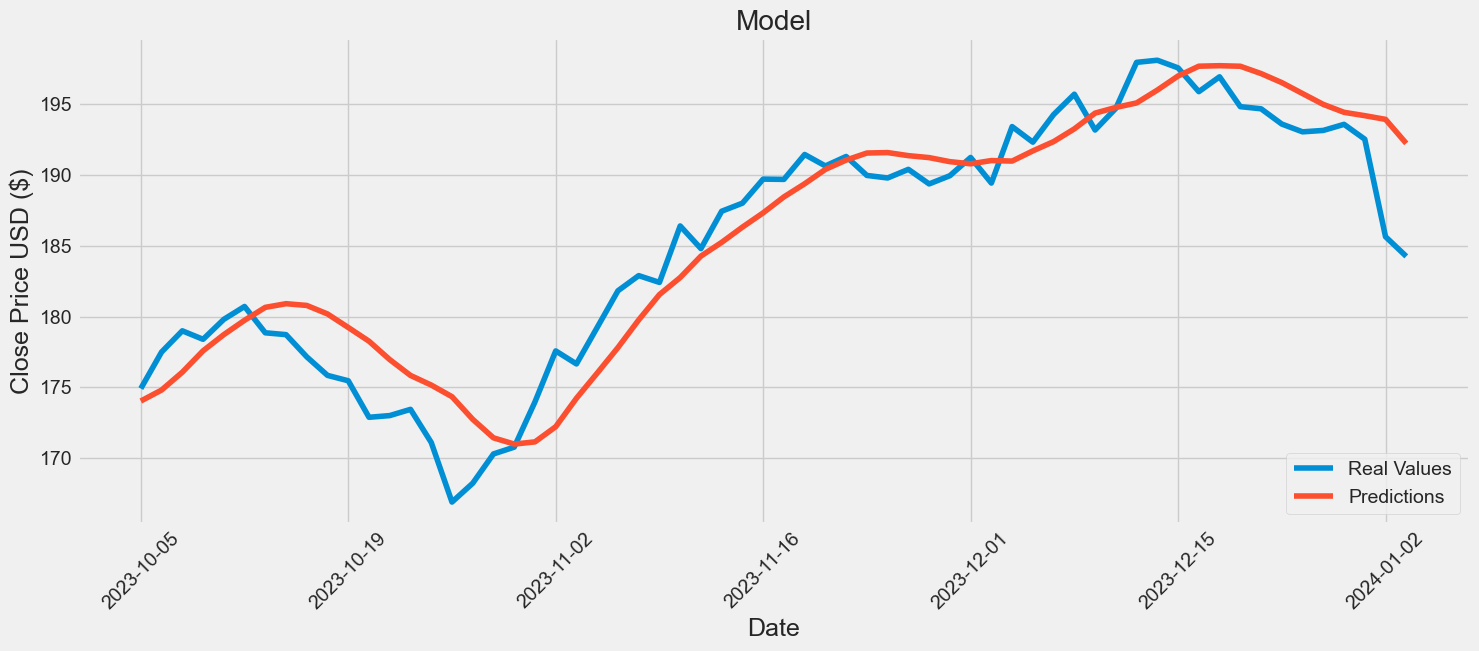

In [35]:
# Plot the data
valid = data[training_data_len:]
valid['predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['close', 'predictions']])
plt.legend(['Real Values', 'Predictions'], loc='lower right')

# Rotate and format the x-axis labels
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Optional: Adjust tick frequency
interval = 10  # Adjust the interval to suit your data
plt.xticks(np.arange(0, len(valid), step=interval))

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208884\3584682724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


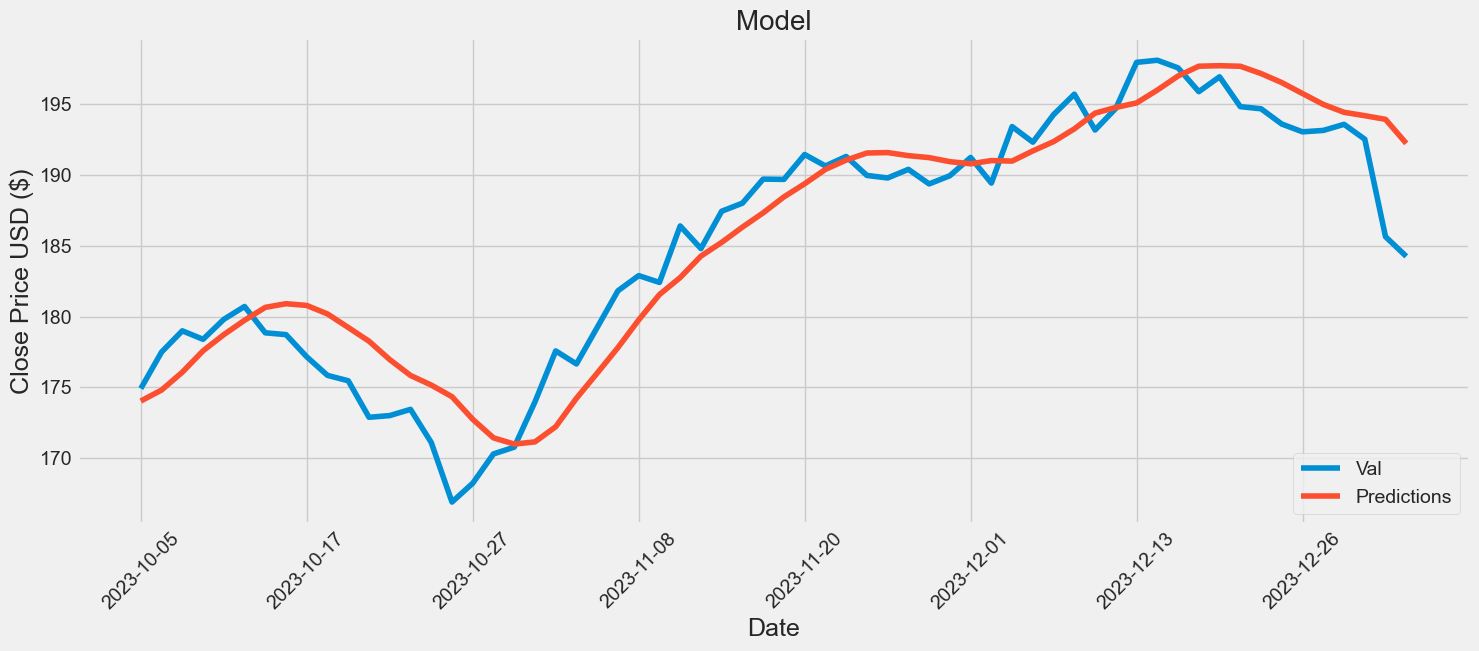

In [36]:
# Plot the data
valid = data[training_data_len:]
valid['predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the close price and predictions
plt.plot(valid[['close', 'predictions']])

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Optionally, you can format the x-axis to display fewer dates
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show max 10 dates on x-axis

# Add legend
plt.legend(['Val', 'Predictions'], loc='lower right')

# Show the plot
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #, root_mean_squared_error

# Assuming y_test are the actual values and y_pred are the predicted values
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
#rmse = root_mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}") # better close to 0
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")


MSE: 8.83397492263041
RMSE: 2.9722003503516397
MAE: 2.3859845758253524
R2: 0.8826573914664999


In [38]:
# Show the valid and predicted prices
valid['Diff'] = abs(valid['close'] - valid['predictions'])
valid['Diff-Percentage'] = (abs(valid['close'] - valid['predictions']) * 100 ) / valid['close']

display(valid.head(10))
display(valid.tail(10))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208884\2020599982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff'] = abs(valid['close'] - valid['predictions'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_208884\2020599982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Diff-Percentage'] = (abs(valid['close'] - valid['predictions']) * 100 ) / valid['close']


,close,predictions,Diff,Diff-Percentage
time,,,,
2023-10-05,174.91,174.028961,0.881039,0.503710
2023-10-06,177.49,174.803894,2.686106,1.513384
2023-10-09,178.99,176.065216,2.924784,1.634049
2023-10-10,178.39,177.575912,0.814088,0.456353
2023-10-11,179.80,178.720261,1.079739,0.600522
2023-10-12,180.71,179.733597,0.976403,0.540315
2023-10-13,178.85,180.647324,1.797324,1.004934
2023-10-16,178.72,180.906189,2.186189,1.223248
2023-10-17,177.15,180.782623,3.632623,2.050592


,close,predictions,Diff,Diff-Percentage
time,,,,
2023-12-19,196.94,197.723541,0.783541,0.397858
2023-12-20,194.83,197.685379,2.855379,1.465575
2023-12-21,194.68,197.168381,2.488381,1.278190
2023-12-22,193.60,196.529541,2.929541,1.513193
2023-12-26,193.05,195.755753,2.705753,1.401581
2023-12-27,193.15,194.988510,1.838510,0.951856
2023-12-28,193.58,194.429886,0.849886,0.439036
2023-12-29,192.53,194.192688,1.662688,0.863599
2024-01-02,185.64,193.931885,8.291885,4.466648
